In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [47]:
dataset = pd.read_csv('student.csv')

In [48]:
dataset.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [51]:
math = dataset['Math'].values
reading = dataset['Reading'].values
writing = dataset['Writing'].values

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
n = len(reading)
X0 = np.ones(n)
X = np.array([X0, math, reading]).T
y = np.array(writing)
B = np.zeros(3)

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = y.reshape(y.shape[0],1)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
X.shape

(1000, 3)

In [55]:
X.shape, B.shape, y.shape

((1000, 3), (3,), (1000,))

In [56]:
def cost_function(X,y,B):
    h = np.sum((X.dot(B) - y) ** 2) / (2 * n)
    return h

In [57]:
cost_function(X,y,B)

2470.1100000000001

In [63]:
def gradient_descent(X,y,B,epoch,alpha):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(X,y,B)
        print(i, cost_history[i])
    
    return cost_history, B

In [64]:
cost, weights = gradient_descent(X,y,B,epoch=500,alpha=0.0001)

0 18.0760279409
1 17.1309443192
2 17.073468284
3 17.0168059174
4 16.9606320225
5 16.904942274
6 16.8497324991
7 16.794998561
8 16.7407363587
9 16.6869418263
10 16.6336109331
11 16.5807396832
12 16.5283241148
13 16.4763603008
14 16.4248443474
15 16.3737723947
16 16.323140616
17 16.2729452174
18 16.223182438
19 16.173848549
20 16.1249398541
21 16.0764526885
22 16.0283834192
23 15.9807284444
24 15.9334841934
25 15.8866471264
26 15.8402137338
27 15.7941805365
28 15.7485440853
29 15.7033009608
30 15.658447773
31 15.613981161
32 15.5698977932
33 15.5261943663
34 15.4828676059
35 15.4399142654
36 15.3973311264
37 15.3551149984
38 15.3132627181
39 15.2717711495
40 15.2306371839
41 15.189857739
42 15.1494297595
43 15.109350216
44 15.0696161055
45 15.0302244509
46 14.9911723004
47 14.9524567281
48 14.9140748331
49 14.8760237394
50 14.838300596
51 14.8009025763
52 14.7638268782
53 14.7270707237
54 14.6906313587
55 14.6545060529
56 14.6186920994
57 14.5831868148
58 14.5479875388
59 14.5130916339
6

In [65]:
cost[0], cost[-1]

(18.076027940915424, 10.588060004954528)

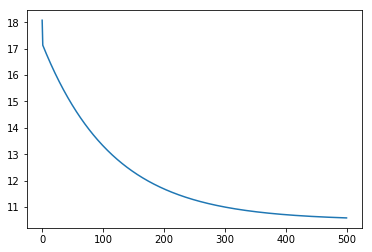

In [66]:
cost_x = [i for i in range(500)]
plt.plot(cost_x, cost)

In [63]:
y_pred = X.T.dot(weights)

In [64]:
y_pred[0]

-9.2991206830552389e+132

In [65]:
y[0]

132500

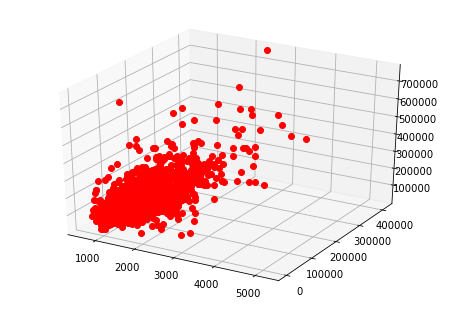

In [67]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(livingArea, landValue, price, 'ro')